# Computer Vision - Assignment 0 - Introduction to OpenCV

#### Bonus: 4 points   |   Due date: September 30, 23:59   |   Submission site: https://pradogrado2223.ugr.es/

### Student's Full Name: <mark>Fernando Luque de la Torre</mark>

The first step is to connect with Google Drive and import the suitable libraries. 

In [1]:
#  We start by getting access to the drive
from google.colab import drive
drive.mount('/content/drive')
import os
# this definition allows to read files in a specific path
get_image = lambda route: os.path.join('/content/drive/MyDrive/images/',route)

Mounted at /content/drive


In [2]:
# We import the modules to use
import cv2
import numpy as np
from matplotlib import pyplot as plt
# With this backend, the output of plotting commands is displayed inline within 
# frontends like the Jupyter notebook, directly below the code cell that produced 
# it. The resulting plots will then also be stored in the notebook document.
# See https://ipython.readthedocs.io/en/stable/interactive/plotting.html
%matplotlib inline

# Exercise 1

Write a function (`readIm`) that reads an image file and displays it either in grayscale or color. `flagColor` is the variable that determines whether the image is displayed in grayscale or color. Depending on the value of `flagColor` we will have a grayscale image (if `0`) or a color image (if `1`). By default, omitting the `flagColor` parameter makes it `flagColor=1` (color). Show that the function works correctly by displaying one grayscale and one color image. 

#### Solution



In [11]:
def readIm(filename, flagColor=1):
  # TO BE FILLED BY THE STUDENT
  if flagColor==1:
    image=cv2.imread(get_image(filename),cv2.IMREAD_COLOR)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  else:
    image=cv2.imread(get_image(filename),cv2.IMREAD_GRAYSCALE)
  return image

We display the color version of the `logoOpenCV.jpg` image (three channels: RGB in matplotlib or BGR in OpenCV)

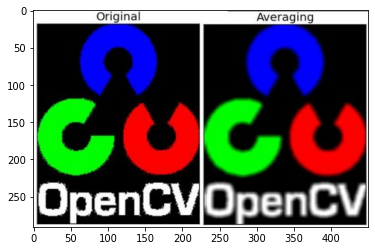

In [ ]:
im_color = readIm(get_image('logoOpenCV.jpg'), 1)
# TO BE FILLED BY THE STUDENT
plt.imshow(im_color)
plt.show()

We display the same image in grayscale (one channel)

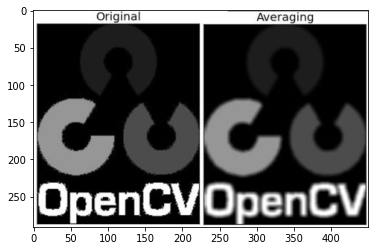

In [ ]:
# TO BE FILLED BY THE STUDENT
im_gray = readIm(get_image('logoOpenCV.jpg'),0)

plt.imshow(im_gray,cmap='gray')
plt.show()

---

# Exercise 2

Write a function that displays an array of arbitrary real numbers (that must include positive and negative values). This function should handle images with one and three bands/channels. You have to display visual examples with random images and real images in both scenarios, one-channel (grayscale) and three-channels (RGB). Hint: band values have to be shifted and scaled in the proper range ([0,1]) to avoid information loss.

#### Solution

In [10]:
def rangeDisplay01(im, flag_GLOBAL=0):
  #check image type (grayscale or color)
  maximo=im.max()
  minimo=im.min()
  im_copy = im.astype(float)
  color = (len(im.shape))==3
  if not color:
  # normalize the grayscale image
  # compute range and apply normalization
    im_copy=(im-minimo)/(maximo-minimo)
  else:
    # normalize each band as a grayscale image 
    if flag_GLOBAL==0:
      maxes = np.zeros(3)
      mins = np.zeros(3)
      for i in range(len(im[0][0])):
        maxes[i] = im_copy[:,:,i].max()
        mins[i] = im_copy[:,:,i].min()

      for i in range(3):
        color = (im[:,:,i]-mins[i])/(maxes[i]-mins[i])
        im_copy[:,:,i] = color
    else:
      im_copy=(im-minimo)/(maximo-minimo)

  return im_copy

/content/drive/MyDrive/images/india.jpeg
[[ 77  77  77 ... 107 108 109]
 [ 77  77  77 ... 106 107 108]
 [ 77  77  77 ... 107 108 108]
 ...
 [ 36  38  39 ...  96  98  96]
 [ 36  39  39 ...  97  97  96]
 [ 41  41  42 ...  97  97  96]]
( 216 ,  2 )
( 1.0 ,  0.0 )


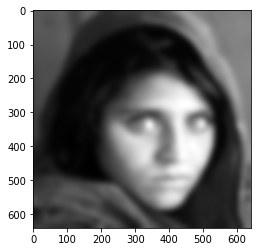

In [ ]:
im = readIm('india.jpeg',flagColor=0)
im = cv2.GaussianBlur(im,(55,55),0)
print("(",im.max(),", ",im.min(),")")
im = rangeDisplay01(im)
print("(",im.max(),", ",im.min(),")")
plt.imshow(im, cmap='gray')

Let's write a function to display any image  with a title

In [9]:
def displayIm(im, title='Result',factor= 1, showFlag=True):  
  # Normalize range
  im = rangeDisplay01(im,0)
  # Display the image
  if len(im.shape) == 3:
    # im has three channels
    plt.imshow(im)
  else:
    # im has a single channel
    plt.imshow(im,cmap='gray')
  figure_size = plt.gcf().get_size_inches()
  plt.gcf().set_size_inches(factor * figure_size)
  plt.title(title) #adding title
  plt.xticks([]), plt.yticks([]) #axis label off
  if showFlag: plt.show()

Lets' test this function using both RGB and gray level images

In [ ]:
rand_mono = (np.random.rand(50, 50)-0.5)*255
rand_multi = (np.random.rand(50, 50, 3)-0.5)*255

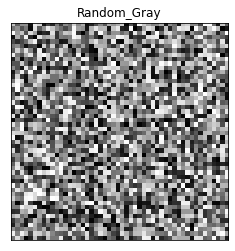

In [ ]:
displayIm(rand_mono,'Random_Gray')

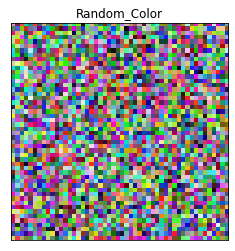

In [ ]:
displayIm(rand_multi, 'Random_Color')

Lets try with the real images given above. 

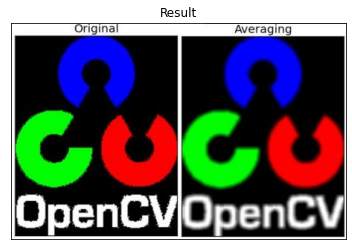

In [ ]:
displayIm(im_color)

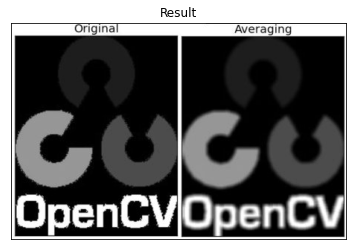

In [ ]:
displayIm(im_gray)

---

# Exercise 3

Write a function that takes as input a sequence/list of images (`vim`) and display them simultaneously on the same canvas. Consider the following cases: (a) images with the same size and number of channels, (b) images with different sizes but the same number of channels, and (c) images with different size and number of channels. Show visual examples of the three scenarios. 

#### Solution

Case (a): the student can concatenate the images by rows and columns using the numpy functions vstack() and hstack().

Case (b): Here a good policy could be to insert the largest image in the upper left corner of the canvas and add new images from the left along the bottom and diagonal iteratively.

Case (c): Convert all single-channel images to three-channel images and go to case (b).

Students are allowed to create two functions (`displayMI_ES` and `displayMI_NES`) to separately tackle scenarios (a) and (b)-(c), respectively. 

In [ ]:
def displayMI_ES(vim, title='Result',factor=1):
  # Let's start with case (a). We concatenate the images by columns, or by rows 
  # and columns, depending on the number of images and their dimensions
  sq = int(np.ceil(np.sqrt(len(vim))))
  rows = []
  for i in range(sq):
    i0 = i*sq
    i1 = np.min([(i+1)*sq, len(vim)])
    if i0<len(vim):
      if (i1-i0)>1:
        rows.append(np.hstack(vim[i0:i1]))
      else:
        rows.append(vim[i0])
  for i in range(1,len(rows)):
    # Si la imagen es más estrecha que la anterior (faltan),
    # Se rellena con negro. Siempre va a pasar en la última
    if len(rows[i][0])<len(rows[i-1][0]):
      height = len(rows[i])
      width = len(rows[i-1][0])-len(rows[i][0])
      if len(vim[0].shape)==3:
        new_row = [rows[i],np.zeros((height,width,3))]
      else:
        new_row = [rows[i],np.zeros((height,width))]
      rows[i] = np.hstack(new_row)
  out = np.vstack(rows)
  return displayIm(out,title,factor)

Let's display two different configurations

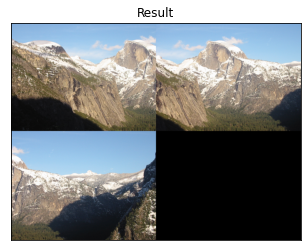

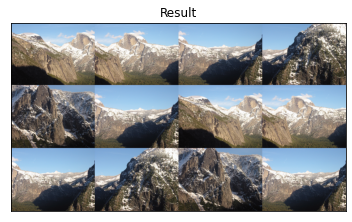

In [ ]:
imcolor_1 = readIm(get_image('yosemite1.jpg'))
imcolor_2 = readIm(get_image('yosemite2.jpg'))
imcolor_3 = readIm(get_image('yosemite3.jpg'))
imcolor_4 = readIm(get_image('yosemite4.jpg'))
imcolor_5 = readIm(get_image('yosemite5.jpg'))
vim=[imcolor_1, imcolor_2, imcolor_3]
displayMI_ES(vim)
vim=[imcolor_1, imcolor_2, imcolor_3,imcolor_4, imcolor_5, imcolor_3,imcolor_1, imcolor_2, imcolor_3,imcolor_4, imcolor_5, imcolor_3,imcolor_1]
displayMI_ES(vim)

Let us now consider the case of images with different sizes but the same number of channels. We can start by placing the first (the largest) in the top-left corner. Then we concatenate by columns and rows the rest of images.

In [ ]:
imcolor_1 = readIm(get_image('dave.jpg'), )
imcolor_2 = readIm(get_image('logoOpenCV.jpg'))
imcolor_3 = readIm(get_image('orapple.jpg'))
imcolor_4 = readIm(get_image('messi.jpg'))
vim=[imcolor_4,imcolor_3,imcolor_2,imcolor_1]

In [7]:
def appendBlackBox2SameHeight(im2, height, side=0): # Side=0 es pegar por arriba, =1 es pegar el negro por abajo
  black_height = height-len(im2)
  black_width = len(im2[0])
  # Creamos el cuadro negro (rgb o grayscale)
  if len(im2.shape)==3:
    black = np.zeros((black_height, black_width,3))
  else:
    black = np.zeros((black_height,black_width))
  if side==0:
    im_copy = np.vstack([black,im2])
  else:
    im_copy = np.vstack([im2,black])
  return im_copy

In [6]:
# Copiamos el único canal en los 3 canales iguales
def preProcessGrays(vim):
  grays = []
  for index, im in enumerate(vim):
    if len(im.shape)==2:
      grays.append(index)
  for i in grays:
    vim[i] = np.repeat(vim[i][:, :, np.newaxis], 3, axis=2)
  return vim

En mi caso, he decidido separar las imágenes en dos filas, de forma que la fila superior siempre sume un ancho mayor o igual que la fila inferior.<br/>
El orden de inserción de las imágenes Es de arriba a abajo e izquierda a derecha, en orden de altura descendente, y respetando la división en dos filas comentada anteriormente<br/>
Aclarar también que en la primera fila, los espacios negros que haya que ampliar se colocarán arriba y en la segunda abajo, para así dejarlos "fuera de la imagen" e intentar que no haya huecos entre ellas

In [8]:
def displayMI_NES(vim):
  # Guardamos el alto de cada imagen con la propia imagen
  vim_save = vim
  vim = preProcessGrays(vim)
  heights = np.zeros(len(vim))
  widths = np.zeros(len(vim))
  for i in range(len(vim)):
    heights[i] = len(vim[i])
    widths[i] = len(vim[i][0])
  # Vamos buscando de mayor a menor altura y guardando los índices
  ordered_indexes = np.zeros(len(vim))
  for i in range(len(vim)):
    a = np.argmax(heights)
    ordered_indexes[i] = int(a)
    heights[a] = -1 # Cada valor encontrado como máximo lo seteamos a -1 para que no lo vuelva a encontrar como máximo
  ordered_indexes=ordered_indexes.astype(int)

  # La disposición de imágenes será en dos filas, de modo que la primera fila contenga las imágenes que sumen
  # más de la mitad de la suma de todas las anchuras
  remaining_sum = 0
  for i in range(len(vim)):
    remaining_sum += len(vim[i][0]) # Sumamos el ancho
  medium = 0
  current_sum = 0
  for i in ordered_indexes.astype(int):
    current_sum += len(vim[i][0])
    remaining_sum -= len(vim[i][0])
    if current_sum < remaining_sum:
      medium += 1
  medium += 1

  # Para aclarar el código reseteamos las alturas y los anchos
  heights = np.zeros(len(vim))
  widths = np.zeros(len(vim))
  for i in range(len(vim)):
    heights[i] = len(vim[i])
    widths[i] = len(vim[i][0])
  heights = heights.astype(int)
  widths = widths.astype(int)

  # Ahora, comenzamos a unir horizontalmente las imágenes en orden descendente de altura de la primera fila, 
  # rellenando con negro la diferencia de altura con la maxima de la fila
  row1 = vim[ordered_indexes[0]]
  max_height = heights[ordered_indexes[0]]
  for i in range(1, medium):
    index = ordered_indexes[i]
    # Lo añadimos encima de la imagen i y a la derecha de las imágenes que llevamos
    current = appendBlackBox2SameHeight(vim[index],max_height)
    row1 = np.hstack([row1,current])

  # Para la segunda fila el mismo procedimiento
  row2=vim[ordered_indexes[medium]]
  max_height=heights[ordered_indexes[medium]]
  for i in range(medium+1,len(vim)):
    index = ordered_indexes[i]
    current = appendBlackBox2SameHeight(vim[index],max_height,side=1)
    row2 = np.hstack([row2,current])

  # Ahora, la primera fila siempre va a ser mayor o igual que la segunda, entonces rellenamos a la derecha de la segunda
  # con negro y unimos verticalmente ambas
  diff = len(row1[0])-len(row2[0])
  if len(vim[0].shape)==3:
    black = np.zeros((max_height, diff,3))
  else:
    black = np.zeros((max_height,diff))
  row2 = np.hstack([row2,black])
  complete = np.vstack([row1,row2])
  vim = vim_save
  return complete

/content/drive/MyDrive/images/dave.jpg
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[251 251 251]
  [255 255 255]
  [252 252 252]
  ...
  [247 247 247]
  [254 254 254]
  [254 254 254]]

 [[250 250 250]
  [253 253 253]
  [255 255 255]
  ...
  [255 255 255]
  [254 254 254]
  [254 254 254]]

 [[255 255 255]
  [251 251 251]
  [253 253 253]
  ...
  [253 253 253]
  [255 255 255]
  [255 255 255]]]
/content/drive/MyDrive/images/logoOpenCV.jpg
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [196 196 196]
  [196 196 196]
  [196 196 196]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [107 107 107]
  [107 107 107]
  [107 107 107]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 253 253]
  [253 2

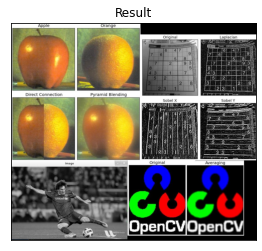

In [13]:
# Mismos canales distinto tamaño
imcolor_1 = readIm(get_image('dave.jpg'))
imcolor_2 = readIm(get_image('logoOpenCV.jpg'))
imcolor_3 = readIm(get_image('orapple.jpg'))
imcolor_4 = readIm(get_image('messi.jpg'))
vim=[imcolor_4,imcolor_3,imcolor_2,imcolor_1]
outIm=displayMI_NES(vim)
displayIm(outIm)

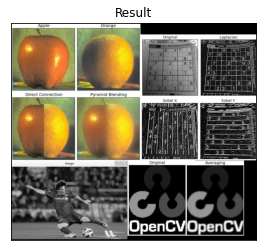

In [ ]:
# Distintos canales, distinto tamaño
imcolor_1 = readIm(get_image('dave.jpg'))
imcolor_2 = readIm(get_image('logoOpenCV.jpg'),flagColor=0)
imcolor_3 = readIm(get_image('orapple.jpg'))
imcolor_4 = readIm(get_image('messi.jpg'))
vim=[imcolor_4,imcolor_3,imcolor_2,imcolor_1]
outIm=displayMI_NES(vim)
displayIm(outIm)

---

# Exercise 4

Write a function that modifies the color in an image for each of the pixel coordinates included in a list. Specifically, students must insert a green square with a side of 50 pixels in the center of the image. The key idea of this exercise is to understand how to modify the pixel values in an image (a 2D spatial array of pixels, where each pixel is defined by one (illumination in grayscale) or three values (RGB-color)).

#### Solution



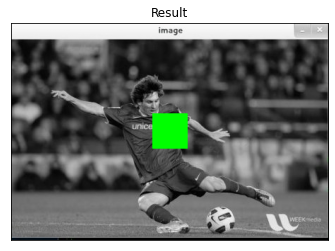

In [ ]:
def changePixelValues(im,cp,nv):
  # cp is a vector of pixel coordinates
  # nv is a vector with the new values
  # replace the values of cp with the nv values
  im_copy = im
  for i in range(len(nv)):
    im_copy[int(cp[i,0]),int(cp[i,1])] = nv[i]
  return displayIm(im_copy)

im = readIm(get_image('messi.jpg'))
# create the list of points with the requested shape
nv = np.full((50**2,3),(0,255,0))
cp = np.zeros((50**2,2))
for i in range(50):
  for j in range(50):
    cp[i*50+j] = [len(im)//2-25+i,len(im[0])//2-25+j]

changePixelValues(im,cp,nv) 

# Exercise 5

Write a function (`print_images_titles`) able to display multiple images, within the same canvas, including specific titles for each one of them. The main novelty of this exercise, with respect to Exercise 3, is the fact of adding a title for each subimage. `print_images_titles` is fed with a list of images and a list of titles. `matplotlib` functions like `add_subplot` or `subplot` can help in this regard.

#### Solution

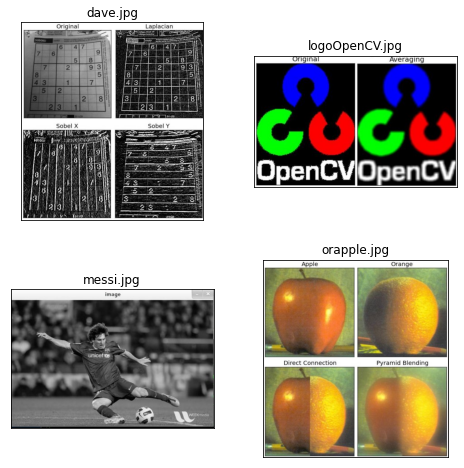

In [ ]:
def print_images_titles(vim, titles=None, rows=2):
  sq = int(np.ceil(np.sqrt(len(vim))))

  fig = plt.figure(figsize=(8,8))
  for i in range(min(sq,int(np.ceil(len(vim)/sq)))):
    for j in range(sq):
      if (len(vim)-i*sq-j)>0:
        ax = fig.add_subplot(sq, sq, i*sq+j+1)
        ax.set_title(titles[sq*i+j])
        ax.set_xticks([]), ax.set_yticks([])
        ax.imshow(vim[sq*i+j])  

im1 = readIm(get_image('dave.jpg'))
im2 = readIm(get_image('logoOpenCV.jpg'))
im3 = readIm(get_image('messi.jpg'))
im4 = readIm(get_image('orapple.jpg'))
im5 = readIm(get_image('bicycle.bmp'))
vim = [im1, im2, im3,im4]    
titles = ['dave.jpg','logoOpenCV.jpg','messi.jpg','orapple.jpg']

print_images_titles(vim, titles)